# Ads CTR Forecasting


 Date: The date on which the ad was displayed or clicked.

Impressions: The number of times the ad was displayed to users.

Clicks: The number of times users clicked on the ad.

CTR: The ratio of clicks to impressions, typically expressed as a percentage.

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
ads=pd.read_csv(r'C:\Users\femif\OneDrive\Documents\Desktop\downloading items\ctr.csv')
ads

,Date,Clicks,Impressions
0,2022-10-19,2851,58598
1,2022-10-20,2707,57628
2,2022-10-21,2246,50135
3,2022-10-22,1686,40608
4,2022-10-23,1808,41999
...,...,...,...
360,2023-10-14,885,28487
361,2023-10-15,1180,33440
362,2023-10-16,1624,41688
363,2023-10-17,1751,40957


In [3]:
# Display the first few rows of the dataset
ads.head()

,Date,Clicks,Impressions
0,2022-10-19,2851,58598
1,2022-10-20,2707,57628
2,2022-10-21,2246,50135
3,2022-10-22,1686,40608
4,2022-10-23,1808,41999


In [4]:
#Display the rows and columns
ads.shape

(365, 3)

In [5]:
#check for null values
ads.isnull().sum()

Date           0
Clicks         0
Impressions    0
dtype: int64

In [6]:
#information about the data
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         365 non-null    object
 1   Clicks       365 non-null    int64 
 2   Impressions  365 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.7+ KB


In [7]:
ads.describe()

,Clicks,Impressions
count,365.000000,365.000000
mean,2070.372603,49612.717808
std,652.136850,9894.719622
min,816.000000,26489.000000
25%,1604.000000,41999.000000
50%,1948.000000,48428.000000
75%,2553.000000,57326.000000
max,3720.000000,72052.000000


In [8]:
ads['Date'] = pd.to_datetime(ads['Date'])

# Set 'Date' column as the index
ads.set_index('Date', inplace=True)

# Display the updated DataFrame
print(ads.head())

            Clicks  Impressions
Date                           
2022-10-19    2851        58598
2022-10-20    2707        57628
2022-10-21    2246        50135
2022-10-22    1686        40608
2022-10-23    1808        41999


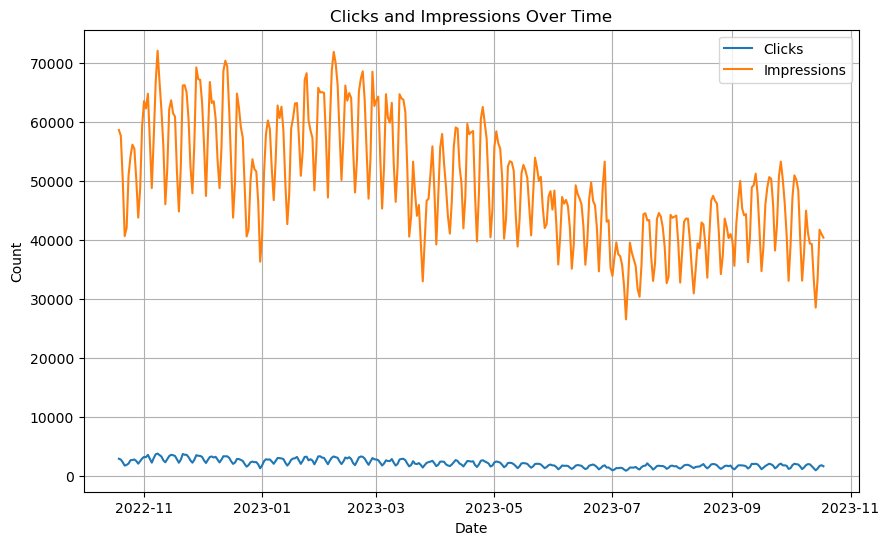

In [9]:
#clicks and impression overtime
plt.figure(figsize=(10, 6))
plt.plot(ads.index, ads['Clicks'], label='Clicks')
plt.plot(ads.index, ads['Impressions'], label='Impressions')

plt.title('Clicks and Impressions Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)

plt.show()

we can see clicks over time is very high but impression over time is very low

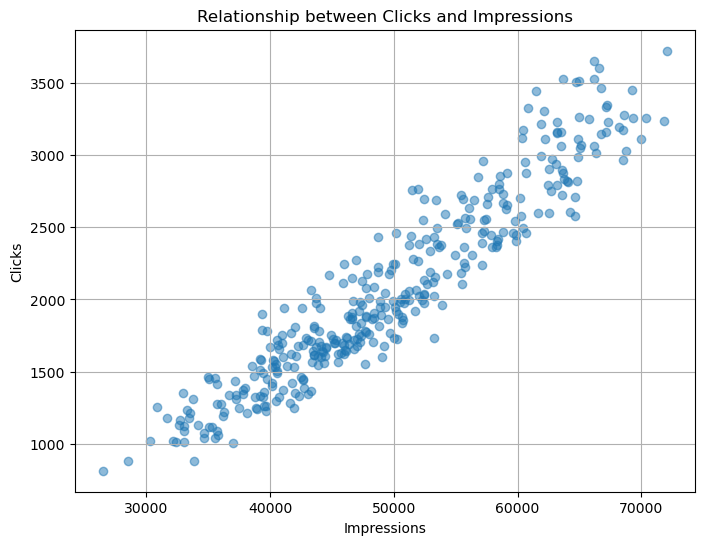

In [10]:
#difference between clicks and impressions
plt.figure(figsize=(8, 6))
plt.scatter(ads['Impressions'], ads['Clicks'], alpha=0.5)

plt.title('Relationship between Clicks and Impressions')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.grid(True)

plt.show()


So, the relationship between clicks and impressions is linear. It means higher ad impressions result in higher ad clicks.

In [11]:
#CTR over time

CTR=( Impressions/Clicks)×100%

CTR is typically expressed as a percentage.

Clicks represent the number of times users clicked on the link or advertisement.

Impressions represent the total number of times the link or advertisement was displayed.

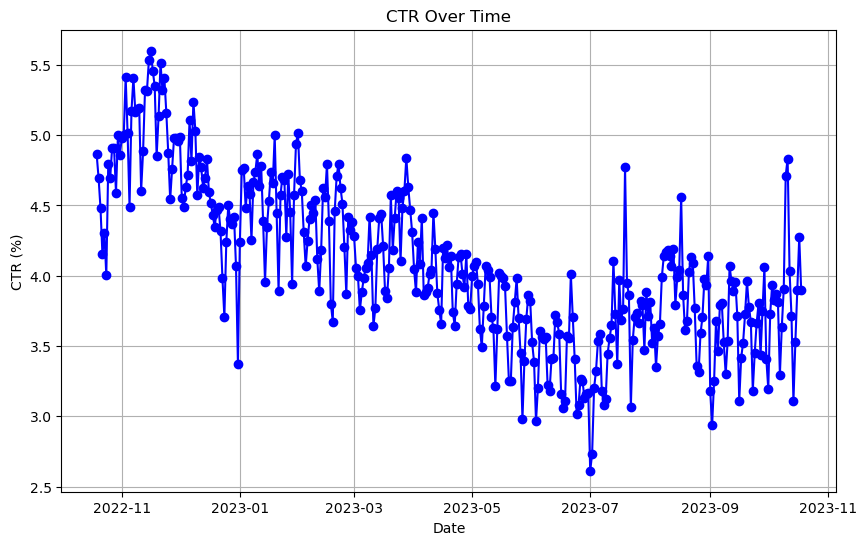

In [12]:
ads['CTR'] = (ads['Clicks'] / ads['Impressions']) * 100

# Plot CTR over time
plt.figure(figsize=(10, 6))
plt.plot(ads.index, ads['CTR'], color='blue', marker='o', linestyle='-')

plt.title('CTR Over Time')
plt.xlabel('Date')
plt.ylabel('CTR (%)')
plt.grid(True)

plt.show()

###### To visualize the average CTR by day of the week

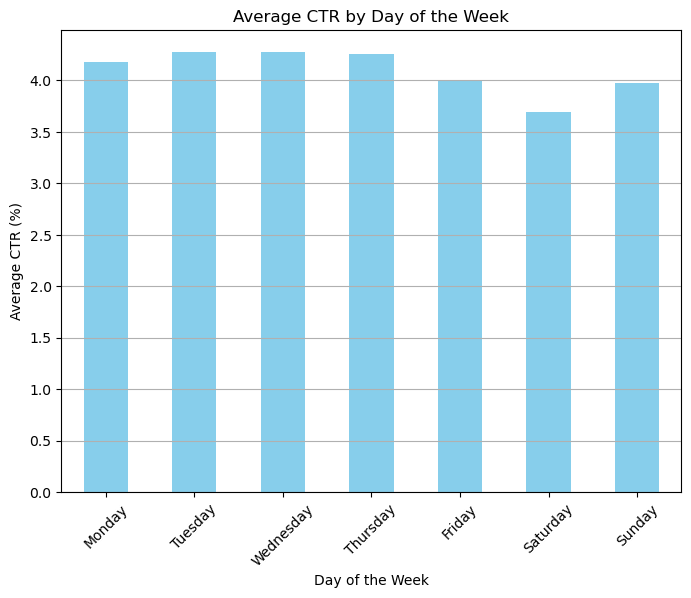

In [14]:

ads['Day_of_Week'] = ads.index.day_name()

# Calculate average CTR by day of the week
average_ctr_by_day = ads.groupby('Day_of_Week')['CTR'].mean()

# Define the order of days for proper sorting in the plot
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot average CTR by day of the week
plt.figure(figsize=(8, 6))
average_ctr_by_day.reindex(days_order).plot(kind='bar', color='skyblue')

plt.title('Average CTR by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average CTR (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for y-axis

plt.show()

days of the week where the average CTR is notably higher. This could indicate peak periods of user engagement with ads, suggesting that those days are optimal for running ad campaigns to maximize click-through rates.

#### To compare the CTR  on weekdays and weekends

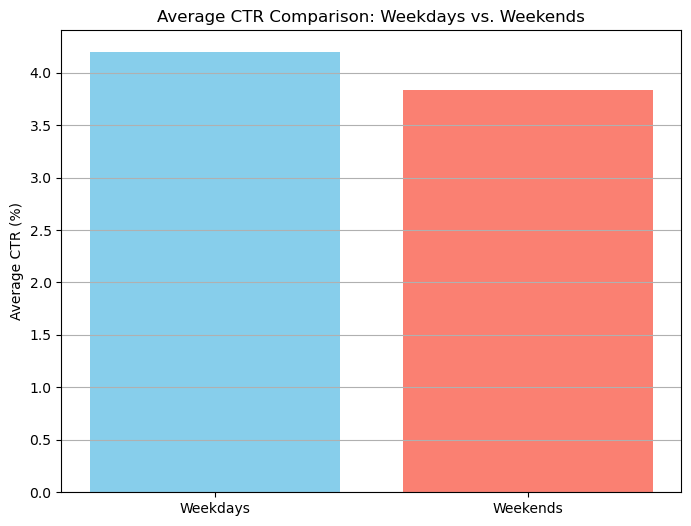

In [15]:
# If not, replace 'CTR' with the actual column name for CTR
ads['Day_of_Week'] = ads.index.day_name()

# Define weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

# Calculate average CTR for weekdays and weekends
average_ctr_weekdays = ads.loc[ads['Day_of_Week'].isin(weekdays), 'CTR'].mean()
average_ctr_weekends = ads.loc[ads['Day_of_Week'].isin(weekends), 'CTR'].mean()

# Plot comparison
plt.figure(figsize=(8, 6))
plt.bar(['Weekdays', 'Weekends'], [average_ctr_weekdays, average_ctr_weekends], color=['skyblue', 'salmon'])

plt.title('Average CTR Comparison: Weekdays vs. Weekends')
plt.ylabel('Average CTR (%)')
plt.grid(axis='y')

plt.show()

Weekend vs. Weekday Behavior: Comparing weekdays to weekends, you might find differences in average CTR. Higher CTRs on weekdays may imply that users are more active and responsive to ads during typical workdays, possibly during breaks or downtime. Conversely, lower CTRs on weekends might suggest reduced engagement as users prioritize leisure activities.

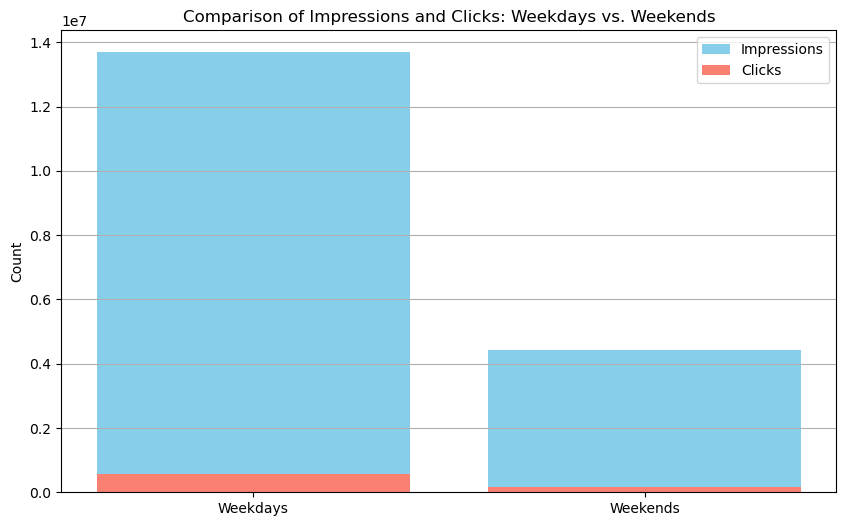

In [16]:
ads['Day_of_Week'] = ads.index.day_name()

# Define weekdays and weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekends = ['Saturday', 'Sunday']

# Calculate total impressions and clicks for weekdays and weekends
total_impressions_weekdays = ads.loc[ads['Day_of_Week'].isin(weekdays), 'Impressions'].sum()
total_clicks_weekdays = ads.loc[ads['Day_of_Week'].isin(weekdays), 'Clicks'].sum()

total_impressions_weekends = ads.loc[ads['Day_of_Week'].isin(weekends), 'Impressions'].sum()
total_clicks_weekends = ads.loc[ads['Day_of_Week'].isin(weekends), 'Clicks'].sum()

# Plot comparison
plt.figure(figsize=(10, 6))

plt.bar(['Weekdays', 'Weekends'], [total_impressions_weekdays, total_impressions_weekends], color='skyblue', label='Impressions')
plt.bar(['Weekdays', 'Weekends'], [total_clicks_weekdays, total_clicks_weekends], color='salmon', label='Clicks')

plt.title('Comparison of Impressions and Clicks: Weekdays vs. Weekends')
plt.ylabel('Count')
plt.legend()
plt.grid(axis='y')

plt.show()

this is how we can analyze and forecast CTR using Python. Ads Click Through Rate Analysis and Forecasting are crucial for businesses to assess the return on investment (ROI) of their advertising efforts and make data-driven decisions to improve ad performance. 